# Car sales analysis w/ visual breakdown

## 1. Import packages and styles

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import seaborn style
sns.set()
sns.set_style('darkgrid')

## 2. Load data

The dataset concerns a selection of automobiles in 1999 and 2008, and includes information about the manufacturer, model, type ('class'), engine size ('displ', 'cyl'), transmission type ('trans'), city/highway fuel efficiency ('cty', 'hwy') in miles/gallon of fuel units.

In [2]:
# load data from csv
mpg_df = pd.read_csv("data/mpg.csv")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
# data shape
mpg_df.shape

(234, 11)

## 3. Visual analysis

### 3.1 City vs highway efficiency by year

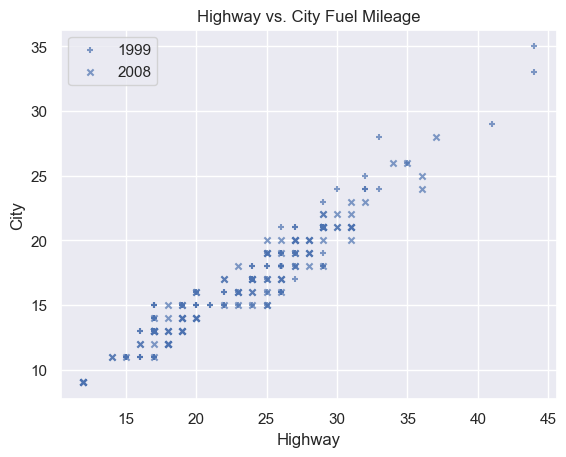

In [4]:
# matplotlib w/ markers

# hide userwarnings
import warnings
warnings.filterwarnings('ignore')

# subplots
fig, ax = plt.subplots()

# assign markers 1999/2008
markers = ['+', 'x']
for i, (name, gdf) in enumerate(mpg_df.groupby('year')):
    gdf.plot.scatter(x="hwy", y="cty", marker=markers[i], ax=ax, alpha=0.7, label=name)

# simple scatter hwy (x) and mpg_df (y)
#ax.scatter(mpg_df['hwy'], mpg_df['cty'])

# add title
ax.set_title("Highway vs. City Fuel Mileage")

# add labels
ax.set_xlabel('Highway')
ax.set_ylabel('City');

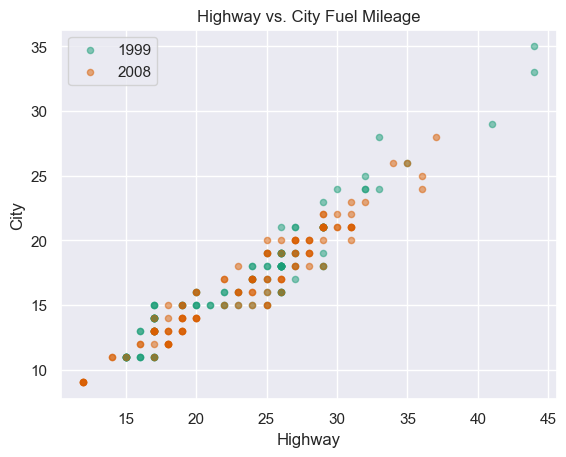

In [5]:
# matplotlib w/ colors

# subplots
fig, ax = plt.subplots()

# assign colors 1999/2008
colors = sns.color_palette('Dark2')

# for loop with gdf
for i, (name, gdf) in enumerate(mpg_df.groupby('year')):
    gdf.plot.scatter(x="hwy", y="cty", color=colors[i], ax=ax, alpha=0.5, label=name)

# add title
ax.set_title("Highway vs. City Fuel Mileage")

# add labels
ax.set_xlabel('Highway')
ax.set_ylabel('City');

# hide userwarnings
import warnings
warnings.filterwarnings('ignore')

### 3.2 City vs highway efficiency by class

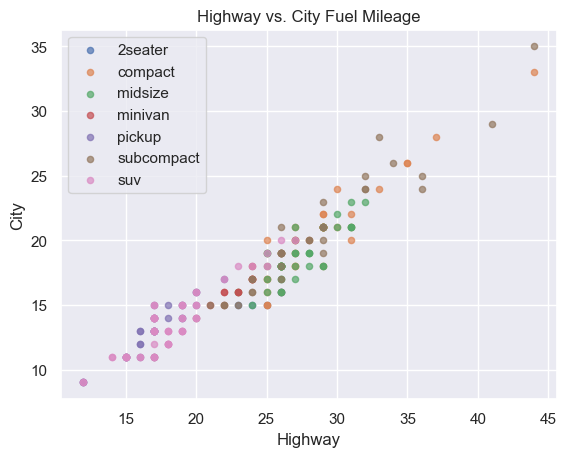

In [6]:
# matplotlib w/ colors

# subplots
fig, ax = plt.subplots()

# assign colors for class
colors = sns.color_palette()

# for loop with gdf for class
for i, (name, gdf) in enumerate(mpg_df.groupby('class')):
    gdf.plot.scatter(x="hwy", y="cty", color=colors[i], ax=ax, alpha=0.7, label=name)

# add title
ax.set_title("Highway vs. City Fuel Mileage")

# add labels
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### 3.3 By year & class double breakdown

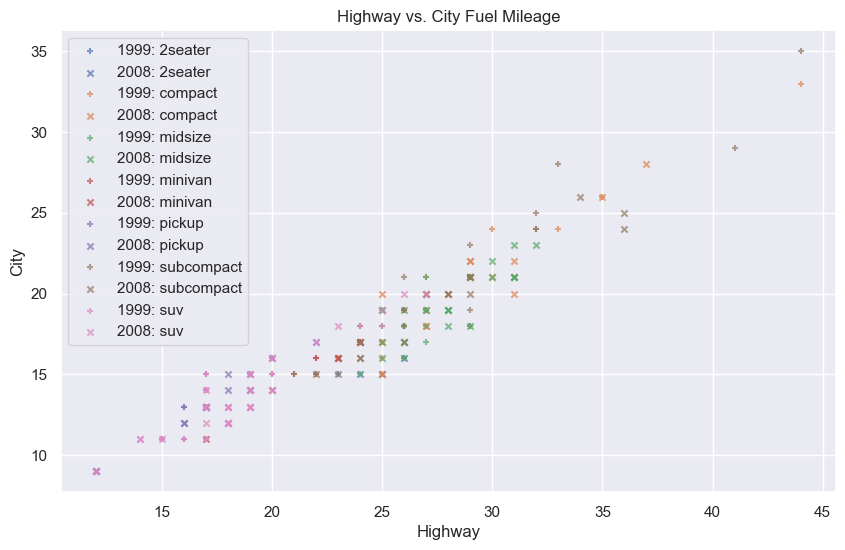

In [7]:
# matplotlib w/ markers & colors

# subplots
fig, ax = plt.subplots(figsize=(10, 6))

# assign markers for year
markers = ['+', 'x']

# assign colors for class
colors = sns.color_palette()

# for loop with gdf fo class and year
for i, (name, gdf) in enumerate(mpg_df.groupby('class')):
    for j, (year, ydf) in enumerate(gdf.groupby('year')):
        label = f"{year}: {name}"
        ydf.plot.scatter(x="hwy", y="cty", color=colors[i], marker=markers[j], ax=ax, alpha=0.7, label=label)

# add title
ax.set_title("Highway vs. City Fuel Mileage")

# add labels
ax.set_xlabel('Highway')
ax.set_ylabel('City');

### 3.4 Displ vs hwy w/ best/worst cars

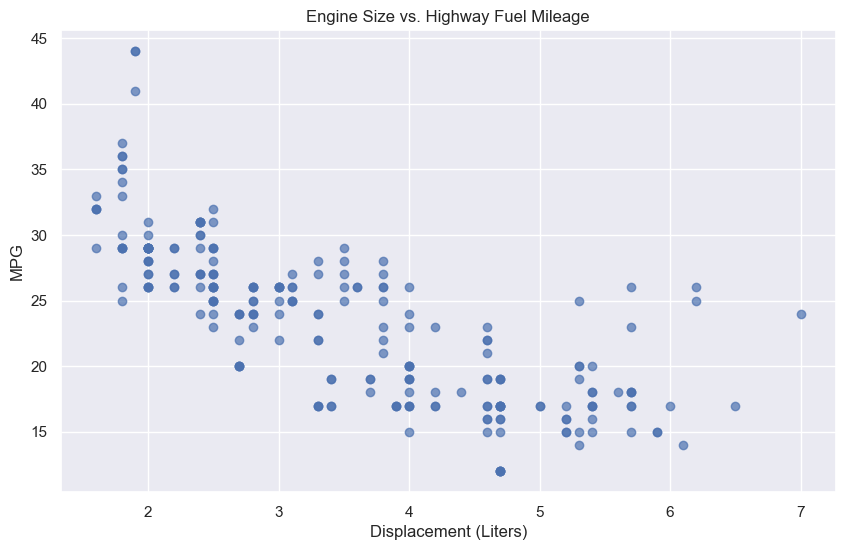

In [8]:
# subplots
fig, ax = plt.subplots(figsize=(10, 6))

# scatter cars
ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.7)

# scatter means
#means = mpg_df.groupby('class').mean()
#ax.scatter(means['displ'], means['hwy'], alpha=0.7)

# title and labels
ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel('Displacement (Liters)')
ax.set_ylabel('MPG');

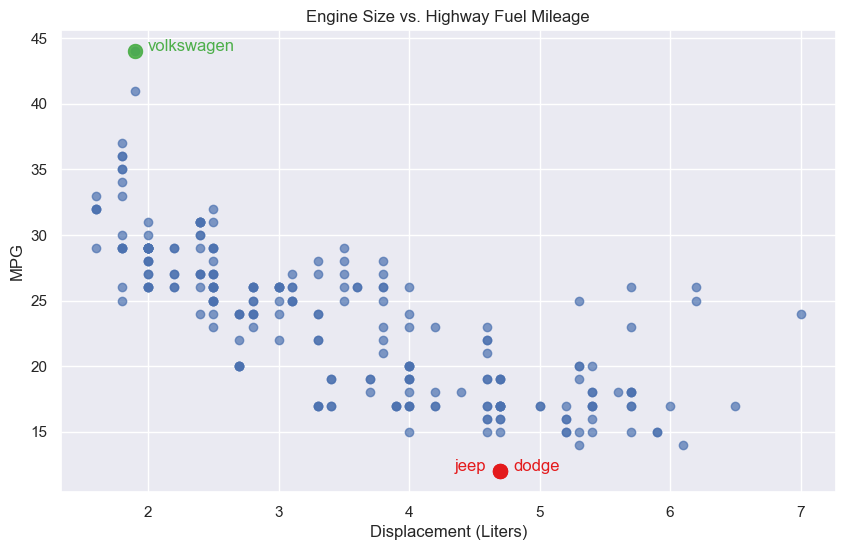

In [9]:
# identify best/worst cars for fuel mileage and manufacturer
max_mpg = mpg_df['hwy'].max()
min_mpg = mpg_df['hwy'].min()
max_mpg_df = mpg_df[mpg_df['hwy'] == max_mpg]
min_mpg_df = mpg_df[mpg_df['hwy'] == min_mpg]
max_manufacturers = pd.unique(max_mpg_df['manufacturer'])
min_manufacturers = pd.unique(min_mpg_df['manufacturer'])

# subplot
fig, ax = plt.subplots(figsize=(10, 6))

# scatter, title, labels
ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.7)
ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel('Displacement (Liters)')
ax.set_ylabel('MPG')

# color for best performing
palette = sns.color_palette("Set1", 7)
ax.scatter(max_mpg_df['displ'], max_mpg_df['hwy'], color=palette[2], alpha=0.7, s=100)
ax.text(max_mpg_df.iloc[0]['displ'] + 0.1, max_mpg_df.iloc[0]['hwy'], max_manufacturers[0], color=palette[2])

# color for worst performing
ax.scatter(min_mpg_df['displ'], min_mpg_df['hwy'], color=palette[0], alpha=0.7, s=100)
ax.text(min_mpg_df.iloc[0]['displ'] + 0.1, min_mpg_df.iloc[0]['hwy'], min_manufacturers[0], color=palette[0])
ax.text(min_mpg_df.iloc[0]['displ'] - 0.35, min_mpg_df.iloc[0]['hwy'], min_manufacturers[1], color=palette[0]);

### 3.5 Displ vs hwy regression

In [10]:
# import package
import statsmodels.formula.api as smf

# variable fit and predict model
def fit_and_predict(df):
    # fit model explaining hwy fuel mileage through displacement
    lm = smf.ols(formula="hwy ~ displ", data=df).fit()
    
    # find two points on the line represented by the model
    x_bounds = [df['displ'].min(), df['displ'].max()]
    preds_input = pd.DataFrame({'displ': x_bounds})
    predictions = lm.predict(preds_input)
    return lm, pd.DataFrame({'displ': x_bounds, 'hwy': predictions})

# fit and predict
lm, pred = fit_and_predict(mpg_df)
rsquared = lm.rsquared

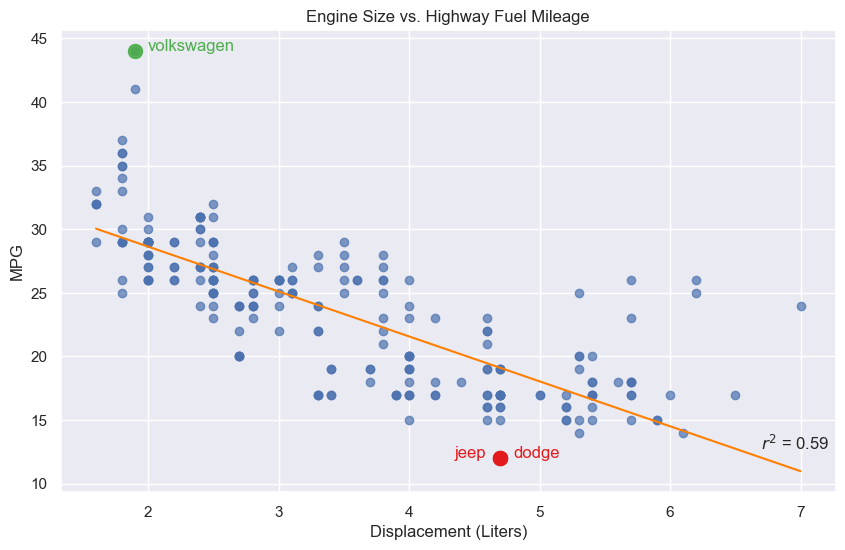

In [11]:
# SAME AS BEFORE

# subplot
fig, ax = plt.subplots(figsize=(10, 6))

# scatter, title, labels
ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.7)
ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel('Displacement (Liters)')
ax.set_ylabel('MPG')

# color for best performing
palette = sns.color_palette("Set1", 7)
ax.scatter(max_mpg_df['displ'], max_mpg_df['hwy'], color=palette[2], alpha=0.7, s=100)
ax.text(max_mpg_df.iloc[0]['displ'] + 0.1, max_mpg_df.iloc[0]['hwy'], max_manufacturers[0], color=palette[2])

# color for worst performing
ax.scatter(min_mpg_df['displ'], min_mpg_df['hwy'], color=palette[0], alpha=0.7, s=100)
ax.text(min_mpg_df.iloc[0]['displ'] + 0.1, min_mpg_df.iloc[0]['hwy'], min_manufacturers[0], color=palette[0])
ax.text(min_mpg_df.iloc[0]['displ'] - 0.35, min_mpg_df.iloc[0]['hwy'], min_manufacturers[1], color=palette[0]);

# ADD FITTED LINE

# draw fitted line of the model
ax.plot(pred['displ'], pred['hwy'], color=palette[4])
ax.text(pred.iloc[1]['displ'] - 0.3, pred.iloc[1]['hwy'] + 1.7, "$r^2$ = {:.2f}".format(lm.rsquared));

### 3.6 Faceting MPG vs Displ by class

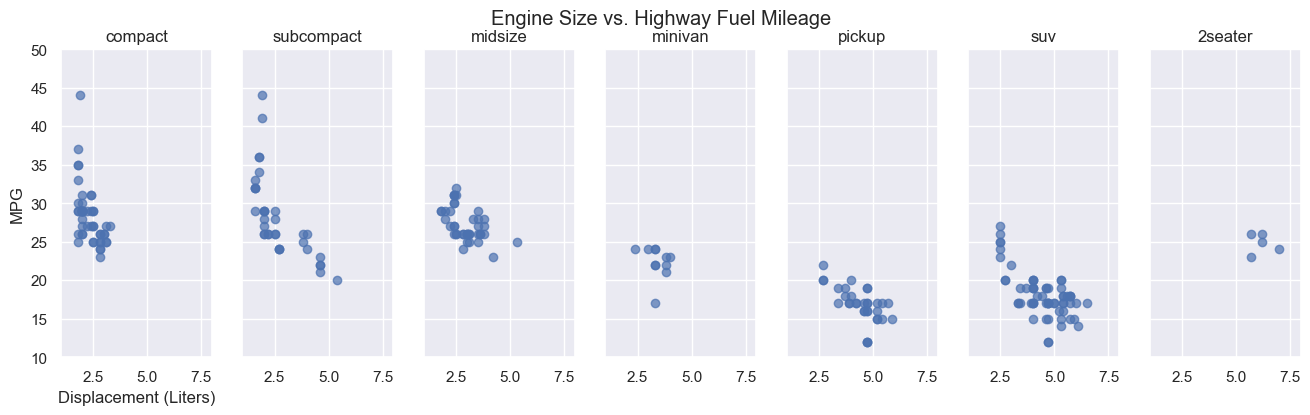

In [12]:
# using matplotlib again

# create dict mapping class by mean displacement (sorted index)
mean_displ = mpg_df.groupby('class').mean()['displ'].sort_values()
class_to_index = {}
for car_class, idx in zip(mean_displ.index, range(len(mean_displ.index))):
    class_to_index[car_class] = idx

# subplots
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)

# scatter by class group
for name, group in mpg_df.groupby('class'):
    idx = class_to_index[name]
    ax = axs[idx]
    ax.scatter(group['displ'], group['hwy'], alpha=0.7, label=name)
    ax.set_xlim([1, 8])
    ax.set_ylim([10, 50])
    ax.set_title(name)
    if idx < 1:
        ax.set_ylabel('MPG')
        ax.set_xlabel('Displacement (Liters)')
        
# figure suptitle        
fig.suptitle("Engine Size vs. Highway Fuel Mileage");